In [4]:
# Creating a price prediction model utilizing Long Short Term Memory (LSTM) in order to predict the 
# average avacado prices on conventional avocados by using the last few years worth of data as a historical reference

# 'The Avacado Toast Restaurant' Price Prediction Analysis 

## The Problem Statement
> Avocado toast became a staple in the breakfast field for Millennials and Gen-Z after Australian real estate mogul Tim Gurner advised young people that by reducing their consumption of the food at restaurants, they would be able to afford a house in today’s competitive market (Guardian News and Media. (2017, May 15)). This, understandably, meme worthy comment sparked a huge demand for the product across the globe and has resulted in every major breakfast player offering the meal as a staple. The result is that avocado prices have surged across the globe and, more specifically, here in the United States.
<br>
</br>
The Avocado Toast Restaurant is now in an interesting predicament in that they were able to take advantage of the demand for the food but are unable to properly forecast future demand and pricing of the main ingredient, avocados. To stay competitive and thrive for the years to come, The Avocado toast restaurant needs a means to forecast the cost of the fruit moving forward.

## Price Prediction Line Graph
> This is a representation of the average price of avacados over the last few years, as well as an estimation of prices based on that historical data.

In [137]:
# Importing the necessary libraries that are to be utilized for price prediction
# Pandas which is a data analysis and manipulation tool
# Numpy which is used to perform a wide variety of mathematical operations on arrays
import pandas as panda
panda.options.mode.chained_assignment = None  # default='warn' 
import numpy as np

# Matplotlib which creates the ability to plot within a notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Math which creates the ability to perform basic mathmatical functions
import math

# Add the libraries to use LSTM, minMax and sequential as part of our analysis
# Keras which is used to make the implementation of neural networks easy
# Sklearn which is an efficient tool for machine learning and statistical modeling
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

# Reads the CSV file for avocado prices
avo_data = panda.read_csv('avocado.csv')

In [158]:
# Extracting the columns needed from the CSV for the analysis and creation of a new dataset
# This data set will be used to focus which prices are being pulled into the analysis
avo_data = avo_data[['Date', 'AveragePrice', 'type', 'region']]

# Pulling by TotalUS region and creating new dataset
# This data set will be used to focus which regions are being pulled into the analysis
avo_data_filter = avo_data[avo_data["region"] == 'TotalUS']

# Further filtering out the conventional only avocados (as that is what the restaurant uses)
# This data set will be used to focus which types of avocados are being pulled into the analysis
avo_data_final_filter = avo_data_filter[avo_data_filter["type"] == 'conventional']

# Sorting data by earliest date first
avo_data_final_filter.sort_values(by='Date', ascending=False)
con_avo_data_final_filter.sort_values(by='Date', ascending=False)

,Date,AveragePrice,type,region
38524,9/6/2015,1.02,conventional,TotalUS
38530,9/27/2015,1.03,conventional,TotalUS
38528,9/20/2015,1.02,conventional,TotalUS
38526,9/13/2015,1.03,conventional,TotalUS
38516,8/9/2015,1.05,conventional,TotalUS
38522,8/30/2015,1.07,conventional,TotalUS
38520,8/23/2015,1.08,conventional,TotalUS
38514,8/2/2015,1.09,conventional,TotalUS
38518,8/16/2015,1.05,conventional,TotalUS
38506,7/5/2015,1.04,conventional,TotalUS


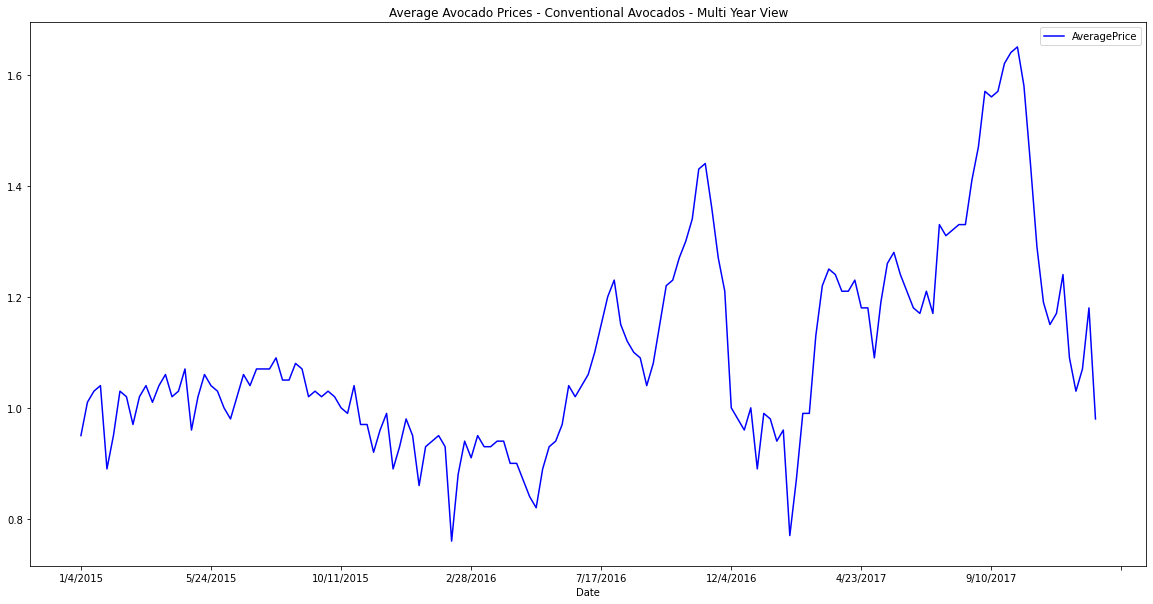

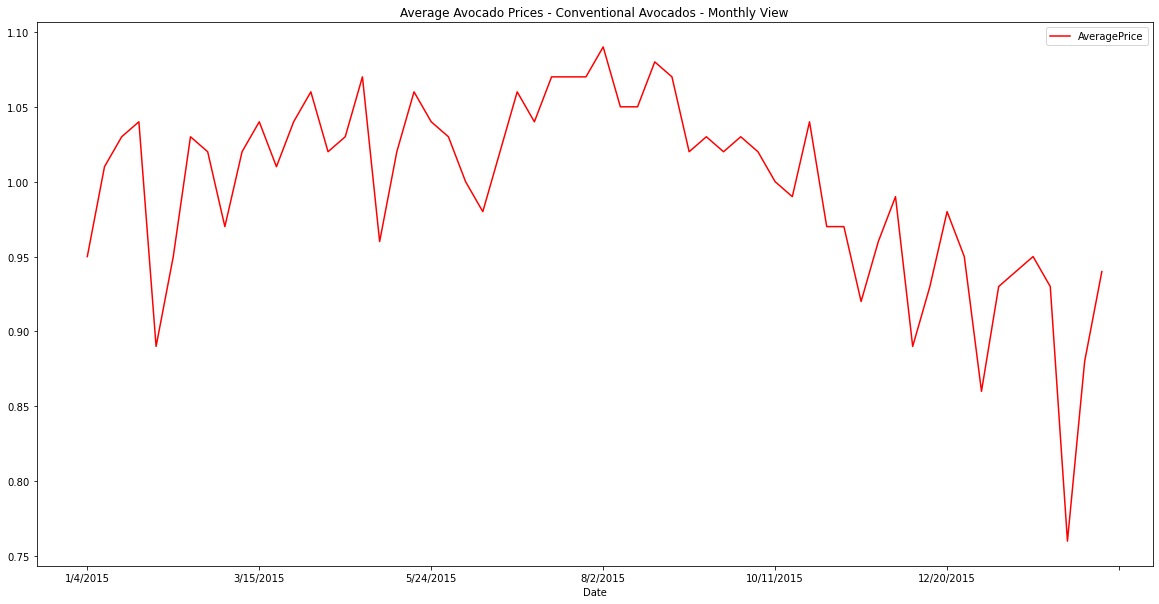

In [155]:
# Visualizing and plotting the date and average price of conventional avocados
avo_data_final_filter.plot('Date','AveragePrice', color="blue")

# Setting the figure size
plt.rcParams['figure.figsize'] = [20, 10]

# Adding title to the figure
plt.title('Average Avocado Prices - Conventional Avocados - Multi Year View')

# Consolidating the amount of data being pulled into the graph in order to eliminate graphing issues
con_avo_data_final_filter = avo_data_final_filter.head(60)

# Visualizing and plotting the condensed date and average price of conventional avocados
con_avo_data_final_filter.plot('Date','AveragePrice', color="red")

# Adding title to the figure
plt.title('Average Avocado Prices - Conventional Avocados - Monthly View')

plt.show()

In [153]:
# Filtering out the average price data
average_data = avo_data_final_filter.filter(['AveragePrice'])

# Converting the data into an array
ds = average_data.values

# We need the 'all' data to reflect between 0 & 1 fo easier data manipulation, the below function does that
s = MinMaxScaler(feature_range=(0,1))
sdata = s.fit_transform(ds)

# Training 75% of the data for use in the analysis
tdl = math.ceil(len(ds) * .75)
td = sdata[0:tdl , : ]

# Creating x & y data sets for plotting visualization
x_train = []
y_train = []

for i in range(60,len(td)):
    x_train=list(x_train)
    y_train=list(y_train)
    
    x_train.append(td[i-60:i,0])
    y_train.append(td[i,0])
    
    # Converting the x & y data sets into arrays
    x_train_A, y_train_A = np.array(x_train), np.array(y_train)
    
    # Reshaping x & y (3 dimensional)
    x_train_B = np.reshape(x_train_A, (x_train_A.shape[0], x_train_A.shape[1],1))

In [142]:
# Building out the LSTM model
m=Sequential()
m.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_B.shape[1],1)))
m.add(LSTM(units=50, return_sequences=False))
m.add(Dense(units=25))
m.add(Dense(units=1))

In [143]:
# Compile the data using mean square (traditional approach for LSTM)
m.compile(optimizer='adam', loss = 'mean_squared_error')
m.fit(x_train_B,y_train_A, batch_size=1, epochs=1)

58/58 [==============================] - 3s 15ms/step - loss: 0.0426


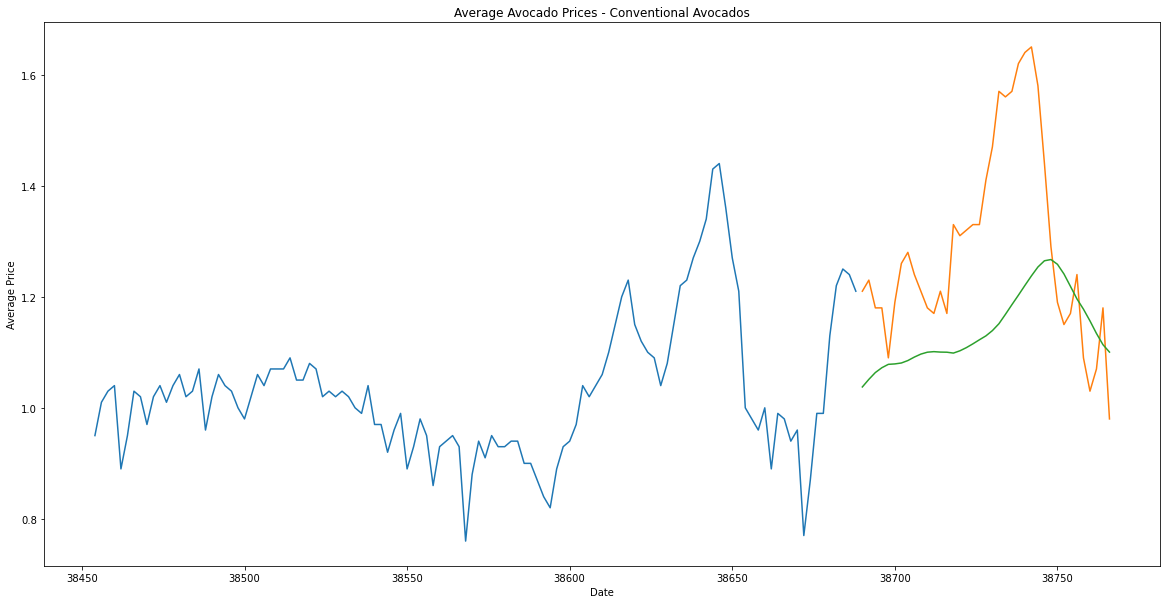

In [160]:
# Creating a test data set
test_d = sd[tdl-60: , : ]
testx = []
testy = ds[tdl : , : ]

for i in range(60, len(test_d)):
    testx.append(test_d[i-60:i,0])
    
# Converting into arrays
testx = np.array(testx)
testx = np.reshape(testx, (testx.shape[0], testx.shape[1],1))

# Predictions
pred = m.predict(testx)
pred = s.inverse_transform(pred)

# Prediction process
train = avo_data_final_filter[:tdl]
valid = avo_data_final_filter[tdl:]
valid['Predictions'] = pred

# Visualizing and plotting the date and predicted average price of conventional avocados
plt.title('Average Avocado Prices - Conventional Avocados')
plt.xlabel('Date')
plt.ylabel('Average Price')

# Setting the figure size
plt.rcParams['figure.figsize'] = [20, 10]

plt.plot(train['AveragePrice'])
plt.plot(valid[['AveragePrice', 'Predictions']])

plt.show()

In [104]:
# Determining how well the model performs (the lower the value the better)
# A 0 would mean that it matches perfectly
rootMean = np.sqrt(np.mean(((pred-testy)**2)))
print(rootMean)

0.5520172751415234
